# ***PENS AND PRINTERS PRODUCT SALES***

### **1- DATA VALIDATION**

In this step, various data validation methods were used to check the shape of the dataset, the data format of the dataset's columns, descriptive statistics of numeric columns, look for missing and incorrect values or duplicates, standardizing mispelled values, fill missing values with the available data, and to remove rows with incorrect values.

The dataset contains 15000 rows and 8 columns before cleaning and validation.

The data was validated accordingly and these are the ways it was done:

**week**: The week of the campaign. Integer data type. This column has 6 unique values and is accurate, no further actions needed.

**sales_method**: The sales approach used (Email, Call, or Email + Call). string data type. Contained incorrect/mispelled values demanding some changes, so those values were replaced by accurate ones.

**customer_id**: Unique identifier for each customer. String data type. Was checked for duplicates, none found, no further actions needed.

**nb_sold**: Number of units sold to the customer. Integer data type. Values seem consistent, no further actions needed.

**revenue**: Revenue generated from the sale. Float64 data type. It had 1074 missing values, which is around 7% of all of its total count, so these missing values were treated, being filled with the median amount corresponding to each sales method.

**years_as_customer**: How long the customer has been with the company. Integer data type. This column contained values that surpass the total time the company has been operating (40 years), as they were not in a significant amount, they were removed.

**nb_site_visits**: Number of times the customer visited the website. Integer data type. Values seem consistent, no further actions needed.

**state**: Customer's state. String data type. Contains all 50 accurate names of the american states, values seem consistent, no further actions needed.


After being validated, the dataset contains 14998 rows and 8 columns, and is ready to go through exploratory analysis.




### Importing Libraries

In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataframe

In [452]:
df = pd.read_csv('product_sales.csv')

### Checking the Dataframe

In [453]:
# Returns the shape and memory usage of the dataframe
print('Dataframe format = {}'.format(df.shape))
print('Memory usage = {:.2f} MB'.format(df.memory_usage().sum() / 1024**2))

Dataframe format = (15000, 8)
Memory usage = 0.92 MB


In [454]:
# Returns first 5 rows of the dataframe
df.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [455]:
# Returns informations about the columns in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [456]:
# Returns descriptive statistics of numerical columns
df.describe()

,week,nb_sold,revenue,years_as_customer,nb_site_visits
count,15000.000000,15000.000000,13926.000000,15000.000000,15000.000000
mean,3.098267,10.084667,93.934943,4.965933,24.990867
std,1.656420,1.812213,47.435312,5.044952,3.500914
min,1.000000,7.000000,32.540000,0.000000,12.000000
25%,2.000000,9.000000,52.470000,1.000000,23.000000
50%,3.000000,10.000000,89.500000,3.000000,25.000000
75%,5.000000,11.000000,107.327500,7.000000,27.000000
max,6.000000,16.000000,238.320000,63.000000,41.000000


In [457]:
# Unique values in 'week' column
df['week'].unique()

array([2, 6, 5, 4, 3, 1], dtype=int64)

In [458]:
# Unique values in 'sales_method' column
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call', 'em + call', 'email'],
      dtype=object)

In [459]:
# Unique values in 'state' column
df['state'].unique(), df['state'].nunique()

(array(['Arizona', 'Kansas', 'Wisconsin', 'Indiana', 'Illinois',
        'Mississippi', 'Georgia', 'Oklahoma', 'Massachusetts', 'Missouri',
        'Texas', 'New York', 'Maryland', 'California', 'Tennessee',
        'Pennsylvania', 'North Dakota', 'Florida', 'Michigan',
        'North Carolina', 'Hawaii', 'Colorado', 'Louisiana', 'Virginia',
        'New Mexico', 'Arkansas', 'Alaska', 'Oregon', 'New Hampshire',
        'Ohio', 'New Jersey', 'Connecticut', 'Iowa', 'Montana',
        'Washington', 'Kentucky', 'Alabama', 'Nebraska', 'South Carolina',
        'Minnesota', 'South Dakota', 'Delaware', 'Maine', 'Utah',
        'West Virginia', 'Vermont', 'Rhode Island', 'Nevada', 'Idaho',
        'Wyoming'], dtype=object),
 50)

### Checking for Missing Values

In [460]:
# Number of missing values in each column
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [461]:
# Checking the proportion of missing values in 'revenue' column
missing_values = df['revenue'].isnull().sum()  
total_values = len(df['revenue'])  

missing_prop = (missing_values / total_values) * 100
print(missing_prop,'%')

7.16 %


### Checking for Duplicates

In [462]:
# Returns number of duplicate rows
df['customer_id'].duplicated().sum()

0

### Standardizing the data

In [463]:
# Standardizes values in 'sales_method' column
df['sales_method'] = df['sales_method'].replace({'em + call': 'Email + Call', 'email': 'Email'})

# Checking the result
df['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

In [464]:
# Looking for abnormal values in 'years_as_customer' column
df['years_as_customer'].value_counts().sort_values(ascending=False).tail(10)

years_as_customer
31    6
32    5
29    5
35    5
36    4
39    3
38    2
37    2
63    1
47    1
Name: count, dtype: int64

In [465]:
# Removing those values
df = df[df['years_as_customer'] < 40]

# Checking the result
df['years_as_customer'].value_counts().sort_values(ascending=False).tail(10)

years_as_customer
34    8
33    8
31    6
32    5
29    5
35    5
36    4
39    3
38    2
37    2
Name: count, dtype: int64

### Filling Missing Values

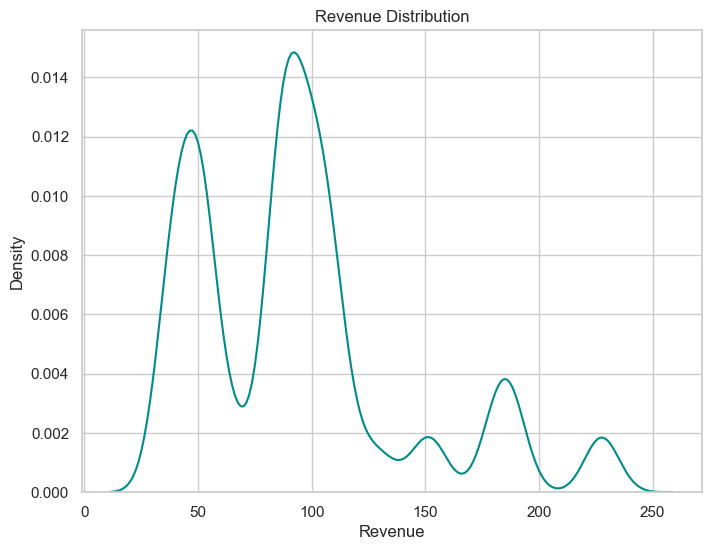

In [466]:
# Checking the distribution of revenue to decide the filling method to use, by mean or median
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='revenue', color='darkcyan')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.show()

In [467]:
# Creating a dictionary with the median of revenue by sales_method
median_revenue_method = df.groupby('sales_method')['revenue'].median().to_dict()
median_revenue_method

{'Call': 49.05, 'Email': 95.58, 'Email + Call': 184.74}

In [468]:
# Maping the dictionary to missing values
df['revenue'] = df['revenue'].fillna(df['sales_method'].map(median_revenue_method))

# Checking the result
df['revenue'].isna().sum(), df.shape

(0, (14998, 8))

### **2- EXPLORATORY ANALYSIS**

In this step, graphs and tables containing overall stats were used to better analyze and get some useful insights on the data. 

Here's what was done:

### Setting Graph Style

In [469]:
sns.set_style('whitegrid')
sns.set_context('notebook')

### Countplot Showing the Total Customers For Each Sales Method

The ***Email*** sales method was the method to reach the most customers, with 7465 customers in total, approximately 50% of all 14998 customers. The ***Call*** method comes in second place with 4961 customers, 33% of all customers. And in third is the ***Email + Call*** method which had 2572 customer, 17% of the total. Taking in consideration that the email method is the easiest and most time effective method to perform, it's easy to comprehend its performance in reaching considerably more customers than the other methods.

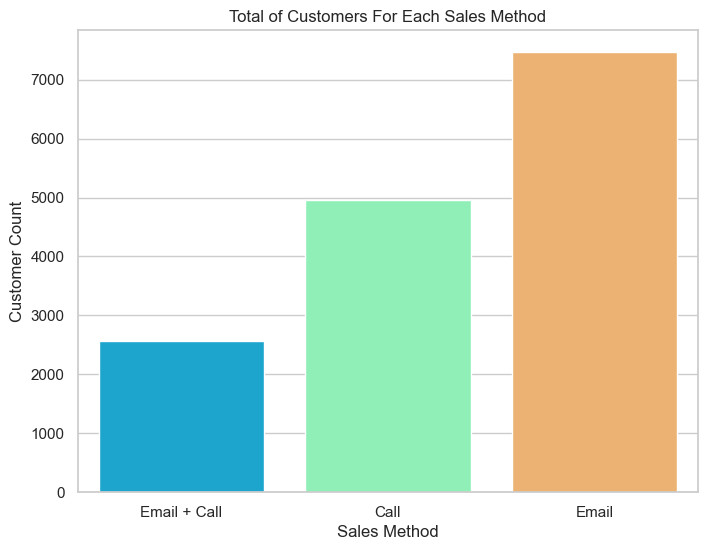

,Total,Proportion
sales_method,,
Email,7465,0.497733
Call,4961,0.330777
Email + Call,2572,0.171490


In [470]:
# Setting the order and palette of sales methods to be displayed
order = ['Email + Call', 'Call', 'Email']
colors = sns.color_palette('rainbow', len(order))
color_map = dict(zip(order, colors))

# Creating the graph
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='sales_method', palette=color_map, order=order)
plt.title('Total of Customers For Each Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Customer Count')
plt.show()

# Table coontaining number of customers and proportion by sales method
nb_customers_method = df.groupby('sales_method').agg(Total=('customer_id', 'count'), Proportion=('customer_id', lambda x: len(x) / len(df))).sort_values(by='Total', ascending=False)
nb_customers_method

### Histplot Showing the Distribution of Revenue

The distribution of revenue is not a normal distribution, being skewed to the right due to having an ***average*** of 95.56, lots of values above the 75th percentile and a high max value.

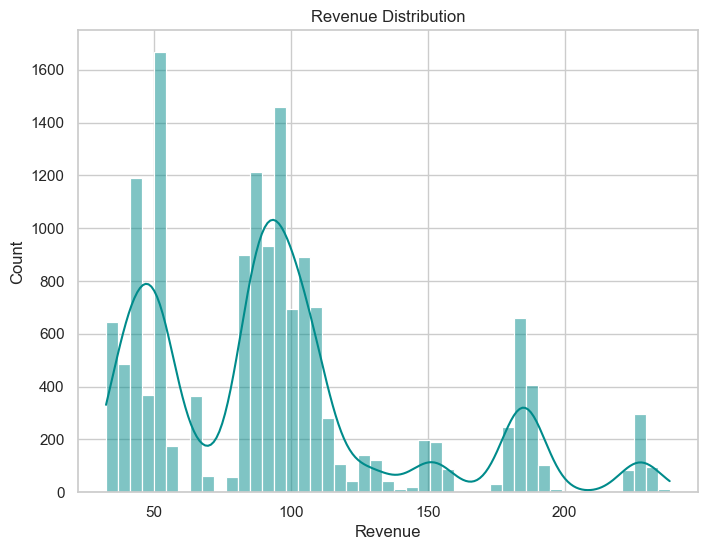

,index,revenue
0,count,14998.000000
1,mean,95.568619
2,std,47.987200
3,min,32.540000
4,25%,52.650000
5,50%,90.950000
6,75%,107.750000
7,max,238.320000


In [471]:
# Setting the graph
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='revenue', color='darkcyan', kde=True)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.show()

# Table containing the descriptive statistics of revenue
df['revenue'].describe().reset_index()

### Boxplot for Overall Units Sold Spread

In the data of number of units sold, we have a ***minimum*** of 7, an ***average*** of 10, and a ***maximum*** of 16 units sold. The majority of values are found inside the IQR, having only few outliers being above the 75% percentile.

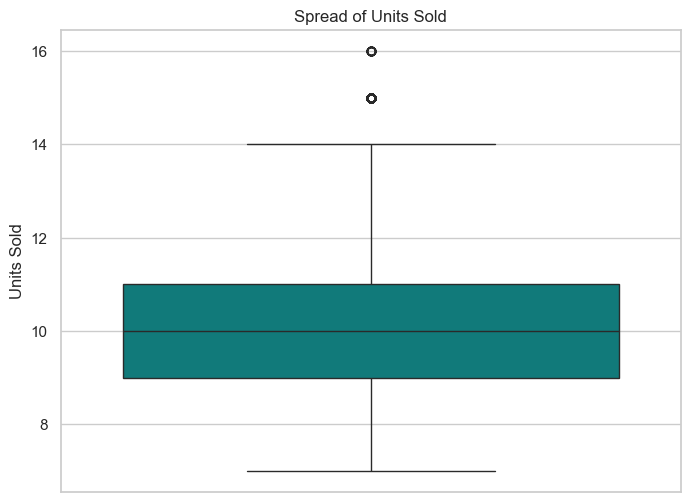

,index,nb_sold
0,count,14998.000000
1,mean,10.084678
2,std,1.812334
3,min,7.000000
4,25%,9.000000
5,50%,10.000000
6,75%,11.000000
7,max,16.000000


In [472]:
# Setting the graph
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['nb_sold'], color='darkcyan')
plt.title('Spread of Units Sold')
plt.ylabel('Units Sold')
plt.show()

# Table containing the descriptive statistics of units sold
df['nb_sold'].describe().reset_index()

### Boxplot Showing the Revenue Spread for Each Sales Method

By looking at the overall spread of revenue by sales method, we can see that there are lots of outliers in Email + Call, both under and above the IQR, meanwhile, the Email and Call methods have no outliers below the IQR and have fewer outliers above the IQR.

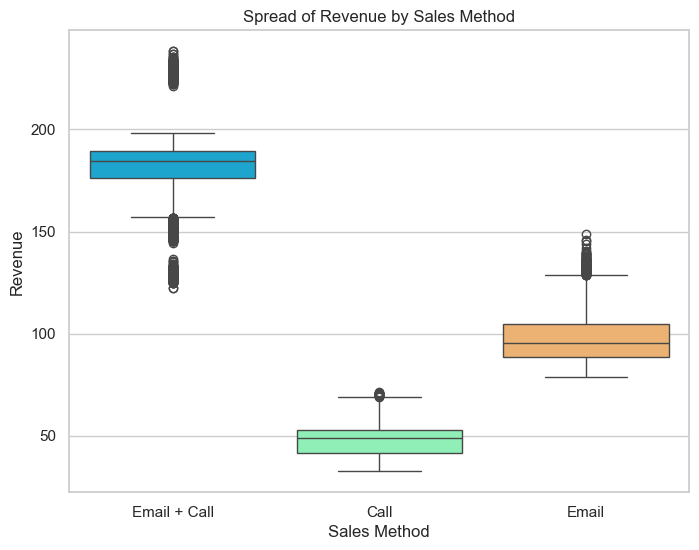

,count,mean,std,min,25%,50%,75%,max
sales_method,,,,,,,,
Call,4961.0,47.649883,8.456520,32.54,41.6300,49.05,52.590,71.36
Email,7465.0,97.014887,10.802488,78.83,88.3900,95.58,104.460,148.97
Email + Call,2572.0,183.798970,27.040536,122.11,176.4375,184.74,189.535,238.32


In [473]:
# Setting the graph
plt.figure(figsize=(8, 6))
sns.boxplot(x='sales_method', y='revenue', data=df, palette=color_map, order=order)
plt.title('Spread of Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Revenue')
plt.show()

# Descriptive statistics of revenue by each sales method
df.groupby('sales_method')['revenue'].describe()

### Barplot showing the average revenue by sales method

What we can see by looking at the average revenues of each method is that the one with the least sales, ***Email + Call***, had the best average revenue overall with an average of 183.7 (almost twice as much as the second place), beating the other methods, ***Email*** with an average of 97, and ***Call*** with an average of 47.6. However, we can see that the total revenue of  the ***Email*** method is highr than the sum of the other 2 methods combined! The numbers are: ***Email*** with a total of 724216.13, ***Email + Call*** with 472730.95, and at last, ***Call*** with a total of 236391.07 revenue. For the ***Email*** method, we have a minimum revenue of 78.83, and average of 97, and a maximum of 148.97. For the ***Email + Call*** we have a minimum revenue of 122.11, an average of 183.8, and a maximum of 238.32. And for the ***Call*** method, we have a minimum of 32.54, an average of 47.6, and a maximum of 71.36 revenue.

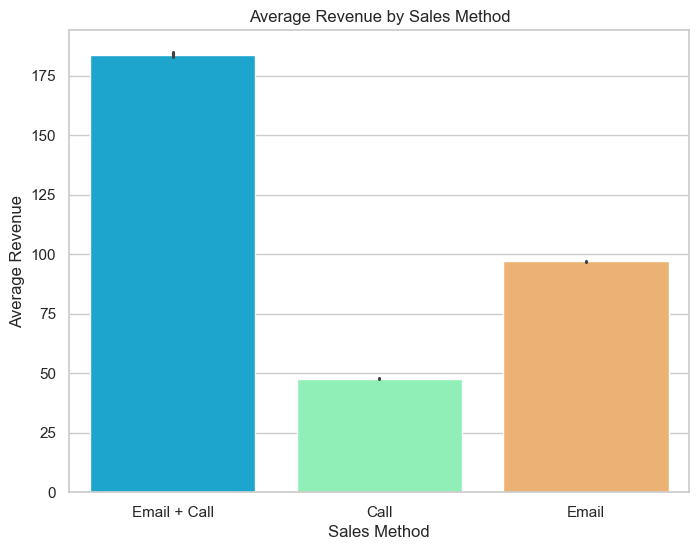

,sales_method,Average,Total
0,Email,97.014887,724216.13
1,Email + Call,183.798970,472730.95
2,Call,47.649883,236391.07


In [474]:
# Setting the graph
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='sales_method', y='revenue', palette=color_map, estimator=np.mean, order=order)
plt.title('Average Revenue by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Average Revenue')
plt.show()

# Table containing the revenue numbers by sales method
df.groupby('sales_method').agg(Average=('revenue', 'mean'), Total=('revenue', sum)).sort_values(by='Total', ascending=False).reset_index()

##

### Lineplot Showing the Trend Difference in Revenue Over Time for Each Sales Method

As we look through the data of revenue over time for each sales method, we can see that the ***Email + Call*** and ***Call*** methods have had consistently increased growth in revenue throughout the weeks, ***Email + Call*** with an average increase of +49.3%, ***Call*** with +6.8%, different than the ***Email*** method, which has seen an average decrease of – 31.8%. In the last week, all methods had a decrease in growth of revenue acquired, with the ***Email*** method having the biggest decrease of 68.5%, followed by ***Call*** with a decrease of 47%, and ***Email + Call***, with the least decrease in growth of 12.6%. Overall, the ***Email + Call*** method has grown the most, but still, with lower total revenue numbers than the ***Email*** method, except in the last 2 weeks when the ***Email + Call*** method got higher revenue numbers than the ***Email*** method.

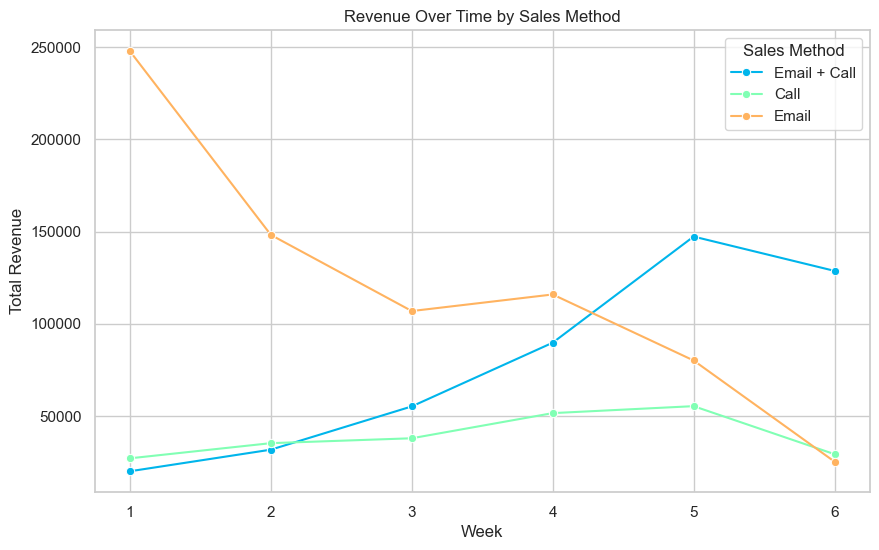

In [475]:
# Setting revenue over time

revenue_over_time = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()

# Setting the graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_over_time, x='week', y='revenue',hue='sales_method', hue_order=order, marker='o', palette=color_map)
plt.title('Revenue Over Time by Sales Method')
plt.xlabel('Week')
plt.ylabel('Total Revenue')
plt.legend(title='Sales Method')
plt.show()

# Table containing revenue and percentage change Over time by sales method
revenue_over_time = revenue_over_time.sort_values(by=['sales_method', 'week'])

revenue_over_time['pct_change'] = revenue_over_time.groupby('sales_method')['revenue'].pct_change() * 100

revenue_unstacked = revenue_over_time.set_index(['week', 'sales_method']).unstack('sales_method')

revenue_unstacked.style.format({('revenue',): '{:,.2f}', ('pct_change',): '{:+,.2f}%'}).set_caption("Revenue and Percentage Change Over Time by Sales Method")


### Average percentage change in revenue over time

In [476]:
average_pct_change_revenue = revenue_unstacked['pct_change'].mean()
average_pct_change_revenue.sort_values(ascending=False)

sales_method
Email + Call    49.301427
Call             6.829167
Email          -31.806229
dtype: float64

### Lineplot Showing the Trend of Customer Amount and Percentage Change Over Time by Sales Method

When we look at the change in number of customers over time, we can see that the ***Email + Call*** method had the best growth in number of customers between the 3 methods, with an average growth of +37.1%, followed by the ***Call*** method with a decrease in growth of -4.7%, and then the ***Email*** method with an average decrease in growth of -36.1%. The decrease in revenue growth in the last week that was seen in the other graph can be explained by the decrease in customer growth for each method.

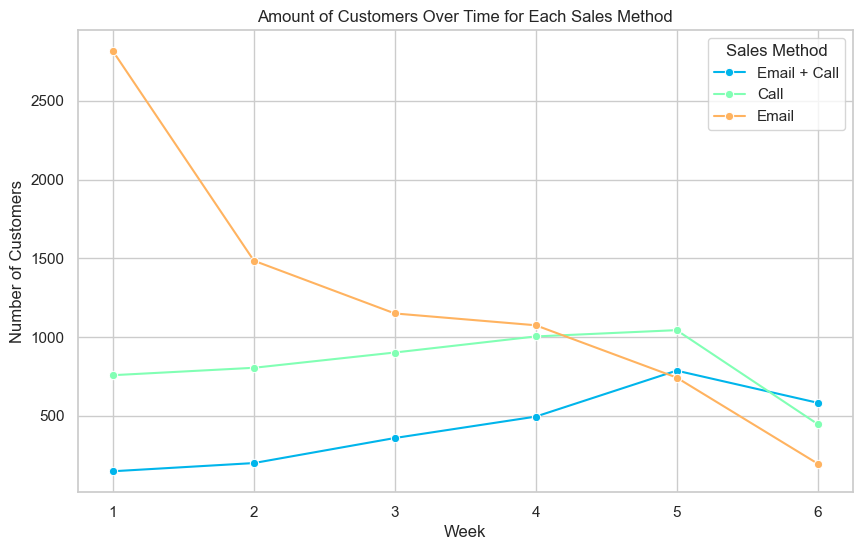

In [477]:
# Setting customer sum
customer_sum = df.groupby(['week', 'sales_method'])['customer_id'].count().reset_index()
customer_sum.columns = ['week', 'sales_method', 'customer_sum']

customer_sum = customer_sum.sort_values(by=['sales_method', 'week'])

# Setting the graph
plt.figure(figsize=(10, 6))
sns.lineplot(data=customer_sum, x='week', y='customer_sum', hue='sales_method', hue_order=order, marker='o', palette=color_map)
plt.title('Amount of Customers Over Time for Each Sales Method')
plt.xlabel('Week')
plt.ylabel('Number of Customers')
plt.legend(title='Sales Method')
plt.show()

# Table containing the customer Amount and percentage change over time by sales method
customer_sum['pct_change'] = customer_sum.groupby('sales_method')['customer_sum'].pct_change() * 100

customer_unstacked = customer_sum.set_index(['week', 'sales_method']).unstack('sales_method')

customer_unstacked.style.format({('customer',): '{:,.2f}', ('pct_change',): '{:+,.2f}%'}).set_caption("Customer Amount and Percentage Change Over Time by Sales Method")

### Average percentage change in number of customers over time

In [478]:
average_pct_change_customers = customer_unstacked['pct_change'].mean()
average_pct_change_customers.sort_values(ascending=False)

sales_method
Email + Call    37.117365
Call            -4.709128
Email          -36.139428
dtype: float64

### **3- METRIC TO MONITOR**

The business goal should be to maximize sales and revenue by maintaining the effort as low as possible so it increases its efficiency. Hence based on the sales strategies tested for the new line of office stationery, the business should focus on monitoring a key metric that reflects both revenue generation and the effort required by the sales team. 

With that in mind, the proposed metric is revenue per hour of sales effort.

This metric accounts for the time spent on each sales approach (Email, Eall, Email + Call) and relates it to the revenue generated. By tracking this metric, the business can evaluate the efficiency of each method and optimize resource allocation based on the return generated from time spent by the team.

We can estimate the time spent on each sales strategy as follows:

•Email: Minimal time spent, let's assume 1 minute per customer.

•Call: 30 minutes per customer on average.

•Email + Call: 1 minute for the email + 10 minutes for the follow-up call.

Then we can calculate the revenue per hour of sales effort:

•Sum the total revenue for each method.

•Sum the total hours spent on each method.

Then the revenue per hour can be computed by dividing the total revenue by the total time spent in hours.

### Python code to calculate the metric

In [479]:
# Creating an empty column and filling with the respective values
df['time_spent'] = 0
df.loc[df['sales_method'] == 'Email', 'time_spent'] = 1  
df.loc[df['sales_method'] == 'Call', 'time_spent'] = 30  
df.loc[df['sales_method'] == 'Email + Call', 'time_spent'] = 11  

# Deviding by 60 to give us the hours
df['hours_spent'] = df['time_spent'] / 60

# Grouping the total revenue and time spent by slaes method
total_revenue_by_method = df.groupby('sales_method')['revenue'].sum()
total_time_by_method = df.groupby('sales_method')['hours_spent'].sum()

# Calculating the revenue per hour
revenue_per_hour = total_revenue_by_method / total_time_by_method

revenue_per_hour = revenue_per_hour.reset_index()
revenue_per_hour.columns = ['Sales Method', 'Revenue per Hour of Sales Effort']
revenue_per_hour.round().sort_values(by='Revenue per Hour of Sales Effort', ascending=False)

,Sales Method,Revenue per Hour of Sales Effort
1,Email,5821.0
2,Email + Call,1003.0
0,Call,95.0


With that, we can see that the Email method is the most efficient in generating revenue per sales effort, followed by Email + Call and, at last place, the call method which is the least effective method by far.

### **4- SUMMARY AND RECOMMENDATIONS**

**This analysis addresses the problem of creating the most revenue with as much efficiency as possible, by prioritizing the most efficient methods By comparing the performance of different sales methods (Email, Call, Email + Call), the business could benefit a lot in the long-term.**

**Based on the revenue per hour of sales effort metric and on the exploratory analysis, the most appropriate recomendation would be to keep the focus on the Email method which is the most time efficient and has generated the most revenue so far, while keeping track of increases in efficiency of the Email + Call method and diverting the efforts from the Call method to Email + Call, as the Call method compares very poorly to the other methods, demanding way too much time with not as much revenue in result.**

Other recommendations to better improve and understand the data:

• Inconsistent values of the sales_method column should be corrected when collecting the data.

• Implement a strategy to identify the reasons as to why there are missing values corresponding to the revenue, and to fill those values if possible.

• More detailed information of the time spent reaching the customer could be gathered and included into a new column on the dataset.

• Create standardized templates of emails to be sent and include the types into a column on the dataset, so we could take a look at what template of email is the most efficient by A/B testing and other methods.

• Explore new methods of reaching out to new customers

• Gather more information about the period of time the client was approached and when the sale was made.

• Gather more information about the client, such as demographics and preferences.

The business could see a lot of improvements by implementing these strategies, as these strategies can increase the amount and quality of insights we can get from the data gathered.


### 5- **Simulated revenue without the 'Call' method**

By diverting the hours spent with the Call method equally between the other methods, the total change in revenue could reach an estimated increase of 707%. Here's how to calculate this total increase:

In [480]:
# Checking the total time
total_time_by_method

sales_method
Call            2480.500000
Email            124.416667
Email + Call     471.533333
Name: hours_spent, dtype: float64

In [481]:
#Checkin the total revenue
total_revenue_by_method

sales_method
Call            236391.07
Email           724216.13
Email + Call    472730.95
Name: revenue, dtype: float64

In [482]:
# Removing the 'Call' method
method_to_exclude = 'Call'  

sim = df[df['sales_method'] != method_to_exclude].copy()

In [483]:
# Creating new total_revenue without the 'Call' method
total_revenue_2 = sim.groupby('sales_method')['revenue'].sum()
total_revenue_2

sales_method
Email           724216.13
Email + Call    472730.95
Name: revenue, dtype: float64

In [484]:
# Creating new total_time without the 'Call' method
total_time_2 = sim.groupby('sales_method')['hours_spent'].sum()
total_time_2

sales_method
Email           124.416667
Email + Call    471.533333
Name: hours_spent, dtype: float64

In [485]:
# Creating new revenue_per_hour without the 'Call' method
revenue_per_hour_2 = total_revenue_2 / total_time_2

In [486]:
# Rounding the totals and displaying them
revenue_per_hour_2 = sim_revenue_per_hour.round()
revenue_per_hour_2

sales_method
Email           5821.0
Email + Call    1003.0
dtype: float64

In [487]:
# Redistributing the amount of time spent with the 'Call' method to the other methods
total_time_2 += 1240
total_time_2 = total_time_2.round()

In [488]:
# Simulating revenue with the increase
sim_revenue = total_time_2 * revenue_per_hour_2
sim_revenue

sales_method
Email           7939844.0
Email + Call    1717136.0
dtype: float64

In [489]:
# Checking the percentage increase in revenue
((sim_revenue - total_revenue_2) / total_revenue_2) * 100

sales_method
Email           996.336255
Email + Call    263.237482
dtype: float64

In [492]:
# Calculating total increase in revenue
(((sim_revenue.sum() - total_revenue_2.sum()) / total_revenue_2.sum()) * 100).round()

707.0